In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv("house_prices.csv")


In [3]:
# 1 Create Classification Target
# -------------------------------
median_price = df["SalePrice"].median()
df["PriceCategory"] = np.where(df["SalePrice"] > median_price, 1, 0)


In [4]:
# Select features
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt', 'LotArea']
X = df[features]
y = df["PriceCategory"]

In [5]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale for logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# 2 Train Models
# -------------------------------
log_model = LogisticRegression()
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

log_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
# Predictions
y_pred_log = log_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test)



In [8]:
# Probabilities for ROC
y_prob_log = log_model.predict_proba(X_test_scaled)[:, 1]
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]


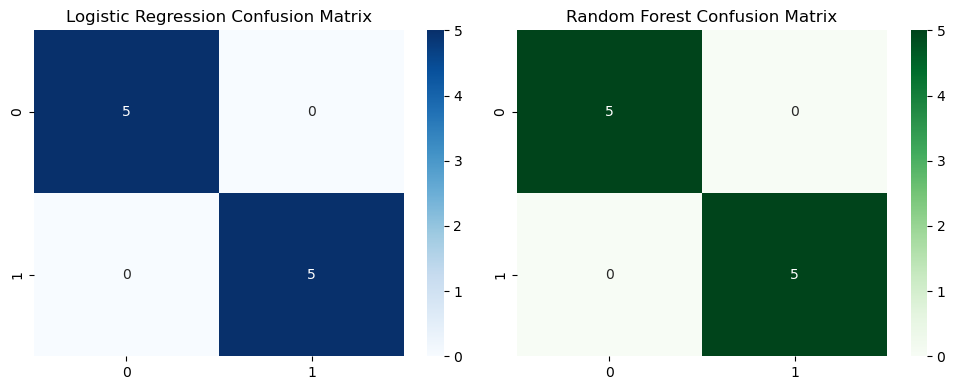

In [9]:
# 3 Confusion Matrices
# -------------------------------
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix")

plt.tight_layout()
plt.show()

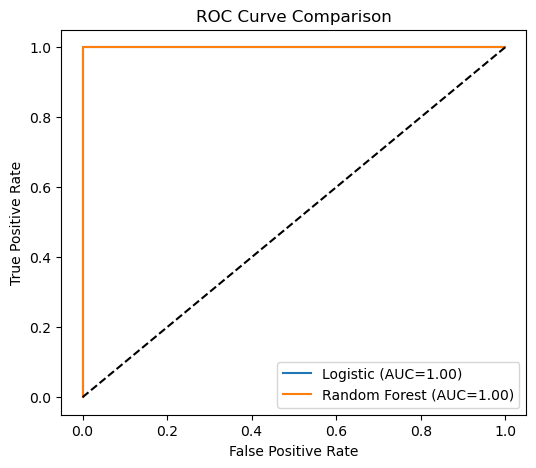

In [10]:
# 4 ROC Curves
# -------------------------------
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(6, 5))
plt.plot(fpr_log, tpr_log, label=f"Logistic (AUC={roc_auc_score(y_test, y_prob_log):.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC={roc_auc_score(y_test, y_prob_rf):.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

In [11]:
# 5 Evaluation Metrics
# -------------------------------
metrics = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [accuracy_score(y_test, y_pred_log), accuracy_score(y_test, y_pred_rf)],
    "Precision": [precision_score(y_test, y_pred_log), precision_score(y_test, y_pred_rf)],
    "Recall": [recall_score(y_test, y_pred_log), recall_score(y_test, y_pred_rf)],
    "F1 Score": [f1_score(y_test, y_pred_log), f1_score(y_test, y_pred_rf)],
    "AUC": [roc_auc_score(y_test, y_prob_log), roc_auc_score(y_test, y_prob_rf)]
})

In [12]:
print("=== Model Evaluation Summary ===")
print(metrics.round(3), "\n")

=== Model Evaluation Summary ===
                 Model  Accuracy  Precision  Recall  F1 Score  AUC
0  Logistic Regression       1.0        1.0     1.0       1.0  1.0
1        Random Forest       1.0        1.0     1.0       1.0  1.0 



In [13]:
#  Summary
# -------------------------------
print("""
 Week 7 Completed
- Confusion matrices visualized
- ROC curves plotted
- Metrics: Precision, Recall, F1, and AUC calculated
- Ready for reflection and milestone submission
""")


 Week 7 Completed
- Confusion matrices visualized
- ROC curves plotted
- Metrics: Precision, Recall, F1, and AUC calculated
- Ready for reflection and milestone submission

